### import gym 和 莫煩的RL

In [1]:
import gym
from RL_brain import DeepQNetwork

C:\Users\flash\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### 呼叫我們要玩的遊戲

In [2]:
env = gym.make('MountainCar-v0')
env = env.unwrapped

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### 列印出遊戲資訊

In [3]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(3)
Box(2,)
[0.6  0.07]
[-1.2  -0.07]


### 建立神經網路 並輸入參數

In [4]:
RL = DeepQNetwork(n_actions=3, n_features=2, learning_rate=0.001, e_greedy=0.9,
                  replace_target_iter=300, memory_size=3000,
                  e_greedy_increment=0.0001,)

total_steps = 0

### 開始遊玩

In [5]:
for i_episode in range(10):

    observation = env.reset()
    ep_r = 0
    while True:
        env.render()

        action = RL.choose_action(observation)

        observation_, reward, done, info = env.step(action)

        position, velocity = observation_

        # 车开得越高 reward 越大
        reward = abs(position - (-0.5))

        RL.store_transition(observation, action, reward, observation_)

        if total_steps > 1000:
            RL.learn()

        ep_r += reward
        if done:
            get = '| Get' if observation_[0] >= env.unwrapped.goal_position else '| ----'
            print('Epi: ', i_episode,
                  get,
                  '| Ep_r: ', round(ep_r, 4),
                  '| Epsilon: ', round(RL.epsilon, 2))
            break

        observation = observation_
        total_steps += 1


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced

Epi:  0 | Get | Ep_r:  1627.6983 | Epsilon:  0.48

target_params_replaced


target_params_replaced


target_params_replaced

Epi:  1 | Get | Ep_r:  353.9623 | Epsilon:  0.57

target_params_replaced


target_params_replaced

Epi:  2 | Get | Ep_r:  110.2106 | Epsilon:  0.6

target_params_replaced


target_params_replaced

Epi:  3 | Get | Ep_r:  112.4561 | Epsilon:  0.66

target_params_replaced

Epi:  4 | Get | Ep_r:  103.6832 | Epsilon:  0.7

target_params_replaced


target_params_replaced

Epi:  5 | Get | Ep_r:  164.0344 | Epsilon:  0.75

target_params_replaced

Epi:  6 | Get | Ep_r:  108.4416 

### 學習結果

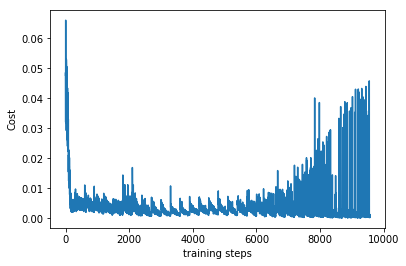

In [7]:
RL.plot_cost()